In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
%matplotlib inline

## k-means
- use data from this link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer


In [9]:
cancer = load_breast_cancer(as_frame=True)
cancer_x = cancer.data
cancer_y = cancer.target

#standardize the data
cancer_x_norm = StandardScaler().fit_transform(cancer_x)

In [14]:
cancer_x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


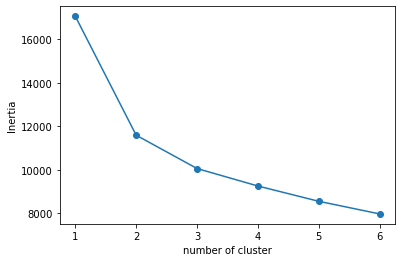

In [15]:
#How many clusters to choose for kcluster, choose the one with the lowest inertia
ks = range(1,7)
inertia = []

for k in ks:
    #create a model with k cluster
    mod = KMeans(n_clusters = k)
    #fit the model and compute inertia and append to list
    mod.fit(cancer_x_norm)
    inertia.append(mod.inertia_)

#plot k and inertia
plt.plot(ks, inertia, '-o')
plt.xlabel("number of cluster")
plt.ylabel("Inertia")
plt.show()

#Looks like n_cluster = 2 would be the best pick 

In [16]:
kmeans = KMeans(n_clusters = 2, random_state = 4)

kmeans.fit(cancer_x_norm)

y_means = kmeans.predict(cancer_x_norm)

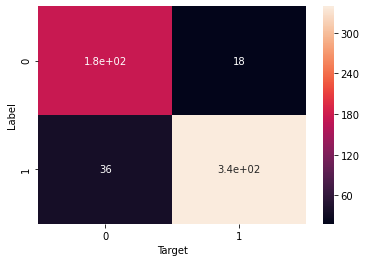

In [18]:
#Create a dataframe with labels and see how many data points are categorized into each class
kdf = pd.DataFrame({'Label': y_means, "Target": cancer_y})

#create a crosstab, tells you how many samples are in each cluster
ct = pd.crosstab(kdf['Label'], kdf['Target'])

sns.heatmap(ct, annot = True)
plt.show()

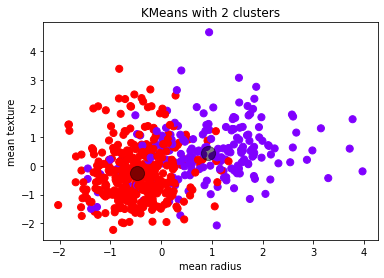

In [19]:

#a few scatter plots (2d) with points colored by cluster
plt.scatter(cancer_x_norm[:,0],cancer_x_norm[:,1], c=y_means, s=50, cmap='rainbow')

#calculate the center
centers = kmeans.cluster_centers_

#plot the center
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.title("KMeans with 2 clusters")
plt.show()